#  Power Query Group By feature & Table.Group Function (5 Examples)

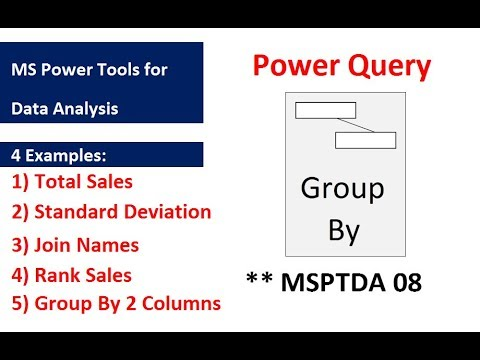

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="hs21s0TWT14", width=500, height=300)

# Data Import

In [2]:
import pandas as pd
import numpy as np

In [5]:
f = 'inputs/msptda 08 - Group by example data.csv'
f = 'inputs/msptda 08 - Group by example data - additional data.csv'

df = pd.read_csv(f, parse_dates=['Date'], sep='\t')
df.head()

,Date,Product,SalesRep,Sales
0,2020-02-22,Quad,Chauntel,1795.01
1,2020-06-02,Carlota,Tyrone,78.81
2,2020-02-18,Bellen,Chauntel,2264.72
3,2020-08-01,Quad,Gigi,146.28
4,2020-01-23,Sunshine,Pham,1373.96


# Simple Groupby 

In [6]:
g1 = df.groupby(['Product']).sum()
g1

,Sales
Product,
Bellen,10368.10
Carlota,17174.77
Quad,15950.70
Sunshine,8883.68


In [7]:
g1 = df.groupby(['Product'])['Sales'].sum().to_frame()
g1

,Sales
Product,
Bellen,10368.10
Carlota,17174.77
Quad,15950.70
Sunshine,8883.68


# Groupby - multiple aggregations

In [8]:
df.groupby(['Product']).agg({'Sales': ['sum', 'std']}).round(2)

Sales        
               sum     std
Product                   
Bellen    10368.10  988.50
Carlota   17174.77  796.93
Quad      15950.70  901.56
Sunshine   8883.68  652.41

# Groupby - named aggregates 

In [9]:
g1 = df.groupby(['Product']).agg(    Total=pd.NamedAgg('Sales', 'sum'),
                                 Total_STD=pd.NamedAgg('Sales', 'std'))
g1.Total_STD = g1.Total_STD.round(2)
g1.reset_index()

,Product,Total,Total_STD
0,Bellen,10368.10,988.50
1,Carlota,17174.77,796.93
2,Quad,15950.70,901.56
3,Sunshine,8883.68,652.41


In [10]:
g1 = df.groupby(['Product']).agg(    Total=pd.NamedAgg('Sales', 'sum'),
                                 Total_STD=pd.NamedAgg('Sales', 'std'))
g1.Total_STD = g1.Total_STD.round(2)
g1.reset_index()

,Product,Total,Total_STD
0,Bellen,10368.10,988.50
1,Carlota,17174.77,796.93
2,Quad,15950.70,901.56
3,Sunshine,8883.68,652.41


# Groupby to rank 

In [11]:
g1 = df.groupby(['Product']).agg(Total=pd.NamedAgg('Sales', 'sum'))
g1['Rank'] = g1.Total.rank(ascending=False).astype(int)
g1.sort_values(by='Rank')

,Total,Rank
Product,,
Carlota,17174.77,1
Quad,15950.70,2
Bellen,10368.10,3
Sunshine,8883.68,4


# Aggregate with two columns

In [12]:
g1 = df.groupby(['Product', 'SalesRep']).agg(Total=pd.NamedAgg('Sales', 'sum'),
                                             Total_STD=pd.NamedAgg('Sales', 'std'))
g1['Rank'] = g1.Total.rank(method='dense', ascending=False).astype(int)
g1.sort_values(by='Rank')


Total    Total_STD  Rank
Product  SalesRep                            
Carlota  Chauntel  6239.08   749.468148     1
         Tyrone    6239.08   717.231899     1
Quad     Tyrone    4538.78   796.142789     2
Bellen   Chauntel  4421.41    76.388746     3
         Gigi      4421.41  1199.084339     3
Quad     Pham      4120.99   946.158207     4
Sunshine Chauntel  3115.98   682.018914     5
         Gigi      2618.63   875.229873     6
Quad     Gigi      2589.54  1177.097791     7
         Sioux     2527.73  1280.223898     8
Carlota  Pham      2384.60          NaN     9
         Sioux     2312.01  1194.678120    10
Quad     Chauntel  2173.66   932.451172    11
Sunshine Sioux     1618.30   639.196246    12
         Pham      1457.68   912.337453    13
Bellen   Tyrone     762.64    46.513484    14
         Sioux      762.64    72.195602    14
Sunshine Tyrone      73.09          NaN    15

# Aggregate multi-index with date index

In [13]:
grouper = pd.Grouper(key='Date', freq='D')
index = [grouper, 'Product', 'SalesRep']

g1 = df.groupby(index).agg(Total=pd.NamedAgg('Sales', 'sum'))
g1 = g1.reset_index()
g1.Date = g1.Date.dt.strftime('%b %Y')
g1 = g1.set_index(['Date', 'Product', 'SalesRep'])
g1

Total
Date     Product  SalesRep         
Jan 2020 Sunshine Chauntel  1073.54
         Carlota  Tyrone    1600.08
         Sunshine Sioux      357.17
         Carlota  Pham      2384.60
         Sunshine Tyrone      73.09
         Carlota  Chauntel   747.34
                  Tyrone    1252.39
         Sunshine Chauntel   191.11
                  Gigi       372.35
                  Pham      1373.96
         Bellen   Sioux      330.27
         Carlota  Chauntel  1617.58
         Quad     Gigi       221.58
                  Sioux     2169.12
         Bellen   Gigi      4311.29
         Carlota  Tyrone    1224.07
         Sunshine Chauntel   247.41
         Carlota  Chauntel   242.12
         Sunshine Chauntel  1603.92
         Carlota  Chauntel  1762.01
         Sunshine Gigi      1883.49
Feb 2020 Quad     Chauntel    89.04
                  Pham       348.87
         Carlota  Tyrone      57.50
         Quad     Tyrone    1758.34
         Bellen   Chauntel  2264.72
                  Sioux      432.37
         Carlota  Tyrone     229.06
         Quad     Pham      2214.03
         Carlota  Tyrone     136.11
         Sunshine Gigi       362.79
         Bellen   Chauntel  2156.69
         Quad     Tyrone    2157.47
                  Chauntel  1795.01
         Sunshine Sioux     1261.13
         Carlota  Chauntel  1598.23
         Bellen   Tyrone     414.21
         Sunshine Pham        83.72
Mar 2020 Bellen   Gigi       110.12
         Quad     Pham      1558.09
Apr 2020 Carlota  Sioux     2000.77
May 2020 Quad     Gigi      2221.68
                  Tyrone     622.97
Jun 2020 Quad     Chauntel   289.61
         Carlota  Tyrone      78.81
Aug 2020 Bellen   Tyrone     348.43
         Quad     Gigi       146.28
         Carlota  Tyrone    1661.06
Sep 2020 Carlota  Chauntel   162.63
Oct 2020 Quad     Sioux      358.61
Nov 2020 Carlota  Chauntel   109.17
                  Sioux      311.24